In [456]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 

In [457]:
dataset = pd.read_csv("/content/drive/MyDrive/train_ctrUa4K.csv")
dataset

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [458]:
dataset.shape


(614, 13)

In [459]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [460]:
dataset['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [461]:
dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


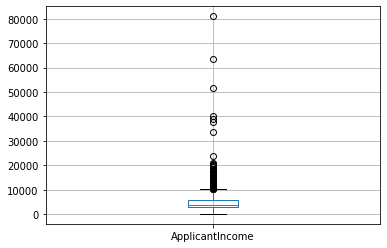

In [462]:
dataset.boxplot(column='ApplicantIncome')

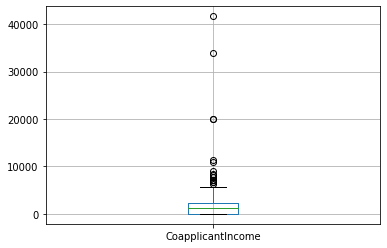

In [463]:
dataset.boxplot(column='CoapplicantIncome')

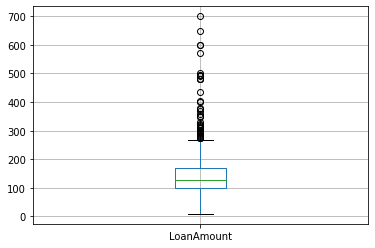

In [464]:
dataset.boxplot(column='LoanAmount')

In [465]:
dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [466]:
dataset['Gender'].fillna(dataset['Gender'].mode()[0],inplace=True)
dataset['Married'].fillna(dataset['Married'].mode()[0],inplace=True)
dataset['Dependents'].fillna(dataset['Dependents'].mode()[0],inplace=True)
dataset['Self_Employed'].fillna(dataset['Self_Employed'].mode()[0],inplace=True)
dataset.LoanAmount = dataset.LoanAmount.fillna(dataset.LoanAmount.mean())
dataset['Loan_Amount_Term'].fillna(dataset['Loan_Amount_Term'].mode()[0],inplace=True)
dataset['Credit_History'].fillna(dataset['Credit_History'].mode()[0],inplace=True)


In [467]:
dataset.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [468]:
new_data = dataset.drop('Loan_ID', axis=1)

In [469]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

In [470]:
for i in range (0,5):
  new_data.iloc[:,i] = labelencoder.fit_transform(new_data.iloc[:,i])

In [471]:
new_data.iloc[:,10] = labelencoder.fit_transform(new_data.iloc[:,10])
new_data.iloc[:,11] = labelencoder.fit_transform(new_data.iloc[:,11])
new_data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0,1
610,1,1,3,0,0,4106,0.0,40.000000,180.0,1.0,0,1
611,1,1,1,0,0,8072,240.0,253.000000,360.0,1.0,2,1
612,1,1,2,0,0,7583,0.0,187.000000,360.0,1.0,2,1


In [472]:
corr_matrix = new_data.corr()
corr_matrix['Loan_Status'].sort_values(ascending=False)

Loan_Status          1.000000
Credit_History       0.540556
Married              0.091478
Property_Area        0.032112
Gender               0.017987
Dependents           0.010118
Self_Employed       -0.003700
ApplicantIncome     -0.004710
Loan_Amount_Term    -0.022549
LoanAmount          -0.036416
CoapplicantIncome   -0.059187
Education           -0.085884
Name: Loan_Status, dtype: float64

In [473]:
pd.crosstab(dataset['Credit_History'],dataset['Loan_Status'],margins = True)

Loan_Status,N,Y,All
Credit_History,,,
0.0,82,7,89
1.0,110,415,525
All,192,422,614


In [474]:
ailowerlimit = new_data['ApplicantIncome'].quantile(0.05)
aiupperlimit = new_data['ApplicantIncome'].quantile(0.75)
lalowerlimit = new_data['LoanAmount'].quantile(0.05)
laupperlimit = new_data['LoanAmount'].quantile(0.88)
colowerlimit = new_data['CoapplicantIncome'].quantile(0.45)
coupperlimit = new_data['CoapplicantIncome'].quantile(0.91)
# ailowerlimit
aiupperlimit
# lalowerlimit
# laupperlimit
# colowerlimit
# coupperlimit

5795.0

In [475]:
o_data = new_data[(new_data['ApplicantIncome']>ailowerlimit) & (new_data['ApplicantIncome']<aiupperlimit)]
o_data = o_data[(n_data['LoanAmount']>lalowerlimit) & (o_data['LoanAmount']<laupperlimit)]
o_data = o_data[(n_data['CoapplicantIncome']>colowerlimit) & (o_data['CoapplicantIncome']<coupperlimit)]

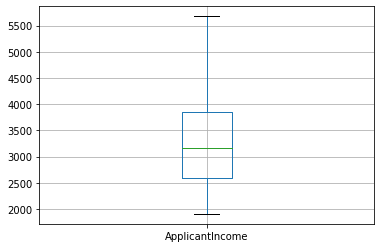

In [476]:
o_data.boxplot(column='ApplicantIncome')

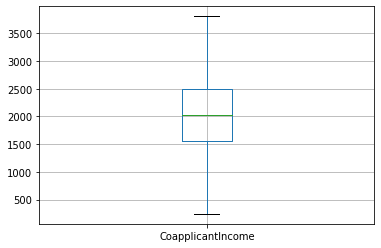

In [477]:
o_data.boxplot(column='CoapplicantIncome')

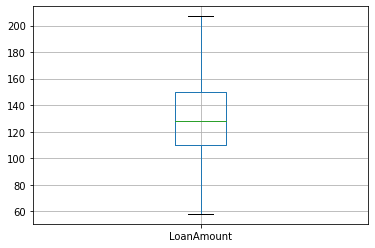

In [478]:
o_data.boxplot(column='LoanAmount')

In [479]:
o_data.shape

(224, 12)

In [480]:
#removing outliers with quantile method is shortening the train data

In [481]:
new_data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0,1
610,1,1,3,0,0,4106,0.0,40.000000,180.0,1.0,0,1
611,1,1,1,0,0,8072,240.0,253.000000,360.0,1.0,2,1
612,1,1,2,0,0,7583,0.0,187.000000,360.0,1.0,2,1


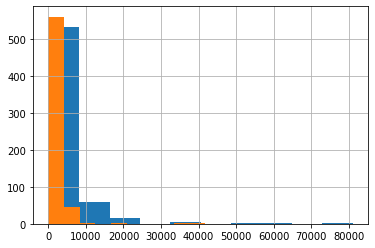

In [482]:
new_data['ApplicantIncome'].hist()
new_data['CoapplicantIncome'].hist()


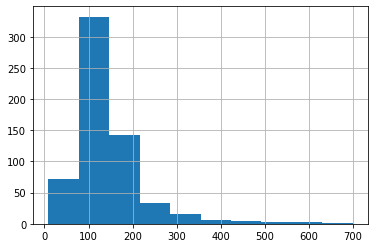

In [483]:
new_data['LoanAmount'].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5d5c618ad0>,
      dtype=object)

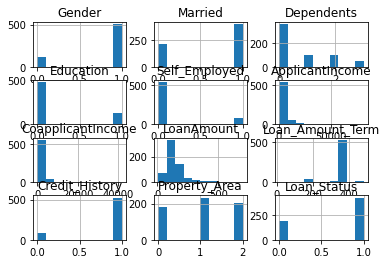

In [484]:
new_data.hist()

In [485]:
ot_data = new_data

In [486]:

mode = ot_data.loc[(new_data['ApplicantIncome']>ailowerlimit) & (new_data['ApplicantIncome']<aiupperlimit),'ApplicantIncome'].mode()
ot_data['ApplicantIncome'] = ot_data['ApplicantIncome'].mask(ot_data['ApplicantIncome']>aiupperlimit,mode)

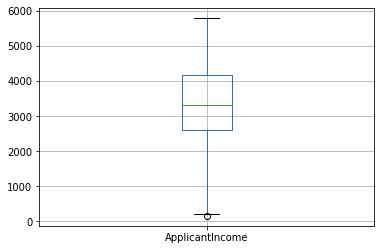

In [487]:
new_data.boxplot(column ='ApplicantIncome')

In [488]:

mode = ot_data.loc[(new_data['LoanAmount']>lalowerlimit) & (new_data['LoanAmount']<laupperlimit),'LoanAmount'].mode()
ot_data['LoanAmount'] = ot_data['LoanAmount'].mask(ot_data['LoanAmount']>laupperlimit,mode)

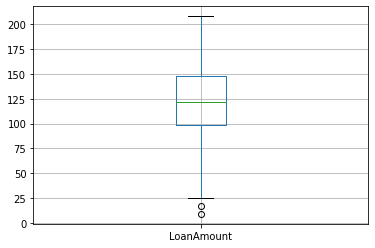

In [489]:
ot_data.boxplot(column ='LoanAmount')

In [490]:

mode = ot_data.loc[(new_data['CoapplicantIncome']>colowerlimit) & (new_data['CoapplicantIncome']<coupperlimit),'LoanAmount'].mode()
ot_data['CoapplicantIncome'] = ot_data['CoapplicantIncome'].mask(ot_data['CoapplicantIncome']>coupperlimit,mode)

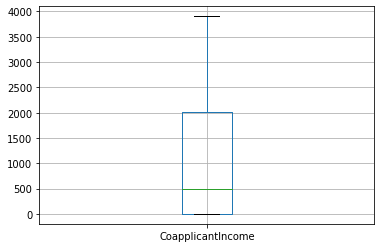

In [491]:
ot_data.boxplot(column='CoapplicantIncome')

In [492]:
ot_data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,2500.0,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,0,0,4583.0,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,0,1,3000.0,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,1,0,2583.0,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,0,0,NaN,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900.0,0.0,71.000000,360.0,1.0,0,1
610,1,1,3,0,0,4106.0,0.0,40.000000,180.0,1.0,0,1
611,1,1,1,0,0,NaN,240.0,NaN,360.0,1.0,2,1
612,1,1,2,0,0,NaN,0.0,187.000000,360.0,1.0,2,1


In [493]:
ot_data.isnull().sum()

Gender                 0
Married                0
Dependents             0
Education              0
Self_Employed          0
ApplicantIncome      153
CoapplicantIncome     56
LoanAmount            74
Loan_Amount_Term       0
Credit_History         0
Property_Area          0
Loan_Status            0
dtype: int64

In [494]:
ot_data.LoanAmount = ot_data.LoanAmount.fillna(dataset.LoanAmount.mean())
ot_data.ApplicantIncome = ot_data.ApplicantIncome.fillna(dataset.ApplicantIncome.mean())
ot_data.CoapplicantIncome = ot_data.CoapplicantIncome.fillna(dataset.CoapplicantIncome.mean())

In [495]:
ot_data.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [496]:
X_train = ot_data.drop('Loan_Status',axis=1)
y_train = ot_data['Loan_Status']

In [497]:
# from sklearn.preprocessing import StandardScaler
# ss= StandardScaler()
# X_train = ss.fit_transform(X_train)

In [498]:
#test data

In [499]:
test_data = pd.read_csv('/content/drive/MyDrive/test_lAUu6dG.csv')
test_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [500]:
test_data['Gender'].fillna(test_data['Gender'].mode()[0],inplace=True)
test_data['Married'].fillna(test_data['Married'].mode()[0],inplace=True)
test_data['Dependents'].fillna(test_data['Dependents'].mode()[0],inplace=True)
test_data['Self_Employed'].fillna(test_data['Self_Employed'].mode()[0],inplace=True)
test_data.LoanAmount = test_data.LoanAmount.fillna(dataset.LoanAmount.mean())
test_data['Loan_Amount_Term'].fillna(test_data['Loan_Amount_Term'].mode()[0],inplace=True)
test_data['Credit_History'].fillna(test_data['Credit_History'].mode()[0],inplace=True)

In [501]:
test_data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [502]:
df_test = test_data.drop('Loan_ID', axis=1)
df_test.shape

(367, 11)

In [503]:
for i in range (0,5):
  df_test.iloc[:,i] = labelencoder.fit_transform(df_test.iloc[:,i])

In [504]:
df_test.iloc[:,10] = labelencoder.fit_transform(df_test.iloc[:,10])

In [505]:
# X_test = ss.fit_transform(df_test)
X_test = df_test
X_test

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,1,0,0,0,5720,0,110.0,360.0,1.0,2
1,1,1,1,0,0,3076,1500,126.0,360.0,1.0,2
2,1,1,2,0,0,5000,1800,208.0,360.0,1.0,2
3,1,1,2,0,0,2340,2546,100.0,360.0,1.0,2
4,1,0,0,1,0,3276,0,78.0,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
362,1,1,3,1,1,4009,1777,113.0,360.0,1.0,2
363,1,1,0,0,0,4158,709,115.0,360.0,1.0,2
364,1,0,0,0,0,3250,1993,126.0,360.0,1.0,1
365,1,1,0,0,0,5000,2393,158.0,360.0,1.0,0


In [506]:
#XGBOOST

In [507]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
import xgboost as xgb

In [508]:
clf = xgb.XGBClassifier()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [509]:
sample = pd.read_csv("/content/drive/MyDrive/test_lAUu6dG.csv")
sample.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [510]:
sample.drop([ 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],axis="columns",inplace=True)

In [511]:
sample["Gender"] = y_pred
sample["Loan_Status"]=sample['Gender'].map({True: 'Y', False: 'N'})
sample.drop(['Gender'], axis='columns', inplace=True)
sample

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y
...,...,...
362,LP002971,Y
363,LP002975,Y
364,LP002980,Y
365,LP002986,N


In [512]:
sample.to_csv('1newxgb.csv', index = False)

In [513]:
#Decision Tree

In [514]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [515]:
sample = pd.read_csv("/content/drive/MyDrive/test_lAUu6dG.csv")
sample.drop([ 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],axis="columns",inplace=True)
sample["Gender"] = y_pred
sample["Loan_Status"]=sample['Gender'].map({True: 'Y', False: 'N'})
sample.drop(['Gender'], axis='columns', inplace=True)
sample.to_csv('3newdecisiontree.csv', index = False)
sample

,Loan_ID,Loan_Status
0,LP001015,N
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y
...,...,...
362,LP002971,N
363,LP002975,Y
364,LP002980,Y
365,LP002986,Y


In [516]:
#KNN

In [517]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import GridSearchCV
                                                 
parameters = {'n_neighbors':[1,3,5,7,9,11,13,15]}
                                                   
knn = KNeighborsClassifier()
model = GridSearchCV(knn,parameters)

model.fit( X_train , y_train)

model.best_params_

{'n_neighbors': 15}

In [532]:
knn = KNeighborsClassifier(n_neighbors=15)

knn.fit( X_train , y_train )
y_pred = knn.predict(X_test)

In [519]:
sample = pd.read_csv("/content/drive/MyDrive/test_lAUu6dG.csv")
sample.drop([ 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],axis="columns",inplace=True)
sample["Gender"] = y_pred
sample["Loan_Status"]=sample['Gender'].map({True: 'Y', False: 'N'})
sample.drop(['Gender'], axis='columns', inplace=True)
sample.to_csv('2.2newknn.csv', index = False)
sample

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y
...,...,...
362,LP002971,Y
363,LP002975,Y
364,LP002980,Y
365,LP002986,N


In [520]:
#Logistic Reg

In [521]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [522]:
sample = pd.read_csv("/content/drive/MyDrive/test_lAUu6dG.csv")
sample.drop([ 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],axis="columns",inplace=True)
sample["Gender"] = y_pred
sample["Loan_Status"]=sample['Gender'].map({True: 'Y', False: 'N'})
sample.drop(['Gender'], axis='columns', inplace=True)
sample.to_csv('2newlogreg.csv', index = False)
sample

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y
...,...,...
362,LP002971,Y
363,LP002975,Y
364,LP002980,Y
365,LP002986,Y


In [523]:
#Random Forest

In [524]:
from sklearn.ensemble import RandomForestClassifier

regressor = RandomForestClassifier()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [525]:
sample = pd.read_csv("/content/drive/MyDrive/test_lAUu6dG.csv")
sample.drop([ 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],axis="columns",inplace=True)
sample["Gender"] = y_pred
sample["Loan_Status"]=sample['Gender'].map({True: 'Y', False: 'N'})
sample.drop(['Gender'], axis='columns', inplace=True)
sample.to_csv('2newrandfor.csv', index = False)
sample

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,N
...,...,...
362,LP002971,Y
363,LP002975,Y
364,LP002980,Y
365,LP002986,N


In [526]:
#SVM

In [527]:
from sklearn.svm import SVC
svc = SVC(probability = True)
fitSVC = svc.fit(X_train, y_train)
y_pred = fitSVC.predict(X_test)

In [528]:
sample = pd.read_csv("/content/drive/MyDrive/test_lAUu6dG.csv")
sample.drop([ 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],axis="columns",inplace=True)
sample["Gender"] = y_pred
sample["Loan_Status"]=sample['Gender'].map({True: 'Y', False: 'N'})
sample.drop(['Gender'], axis='columns', inplace=True)
sample.to_csv('2newsvm.csv', index = False)
sample

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y
...,...,...
362,LP002971,Y
363,LP002975,Y
364,LP002980,Y
365,LP002986,Y


In [529]:
# Naive Bias

In [530]:
from sklearn.naive_bayes import GaussianNB
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
y_pred = gaussian.predict(X_test)

In [531]:
sample = pd.read_csv("/content/drive/MyDrive/test_lAUu6dG.csv")
sample.drop([ 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],axis="columns",inplace=True)
sample["Gender"] = y_pred
sample["Loan_Status"]=sample['Gender'].map({True: 'Y', False: 'N'})
sample.drop(['Gender'], axis='columns', inplace=True)
sample.to_csv('2nb.csv', index = False)
sample

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y
...,...,...
362,LP002971,Y
363,LP002975,Y
364,LP002980,Y
365,LP002986,Y
